Муратов Никита 
БИСТ-20-1
Задание: построить нейронную сеть по варианту
20й вариант
BCEWithLogitsLogs
Hardshrink
НС прямого распросстранения, не менее 2х нелинейных функций
Adama
CIFAR10

In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
import pandas as pd 
import matplotlib as mpl

In [22]:
# Load CIFAR10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True)

Files already downloaded and verified


CIFAR10 это датасет картинок 32x32 с подписами что на них находится 

In [23]:
# Define model dimensions
input_size = 32 * 32 * 3
hidden_size = 128
output_size = 10

In [24]:
# Define the neural network model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.activation1 = nn.Hardshrink()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.activation2 = nn.ReLU()  # Добавленная вторая нелинейная функция активации

    def forward(self, x):
        x = x.view(-1, input_size)
        x = self.activation1(self.fc1(x))
        x = self.activation2(self.fc2(x))  # Применяем вторую функцию активации после второго слоя
        return x

model = NeuralNetwork()


Наша нс работает примерно так, внутри два слоя, линейные функции, обернутые в hardshrink и rele соответственно

In [25]:
# Define loss function and optimizer
criterion = nn.BCEWithLogitsLoss()
learning_rate = 0.001
optimizer = optim.Adam(model.parameters(), learning_rate)
losses = []


In [26]:
# Train the model
for epoch in range(3):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = model(inputs)
        
        # One-hot encode the target labels
        labels_onehot = F.one_hot(labels, num_classes=output_size).float()

        loss = criterion(outputs, labels_onehot)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            losses.append(running_loss)
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
print('Finished Training')



[1,  2000] loss: 0.706
[1,  4000] loss: 0.693
[1,  6000] loss: 0.698
[1,  8000] loss: 0.694
[1, 10000] loss: 0.700
[1, 12000] loss: 0.693
[2,  2000] loss: 0.695
[2,  4000] loss: 0.694
[2,  6000] loss: 0.697
[2,  8000] loss: 0.694
[2, 10000] loss: 0.696
[2, 12000] loss: 0.696
[3,  2000] loss: 0.694
[3,  4000] loss: 0.699
[3,  6000] loss: 0.694
[3,  8000] loss: 0.695
[3, 10000] loss: 0.699
[3, 12000] loss: 0.694
Finished Training


Accuracy on the test dataset: 9 %


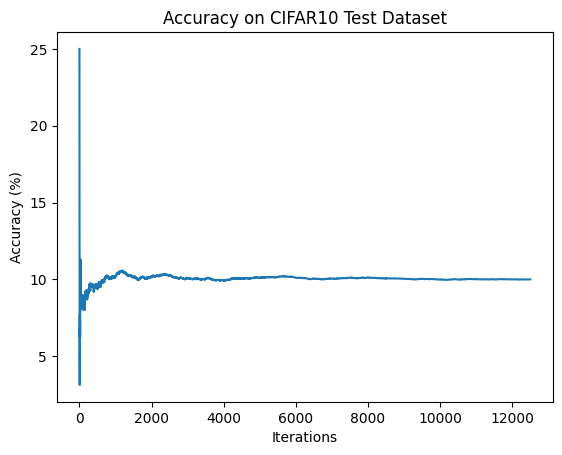

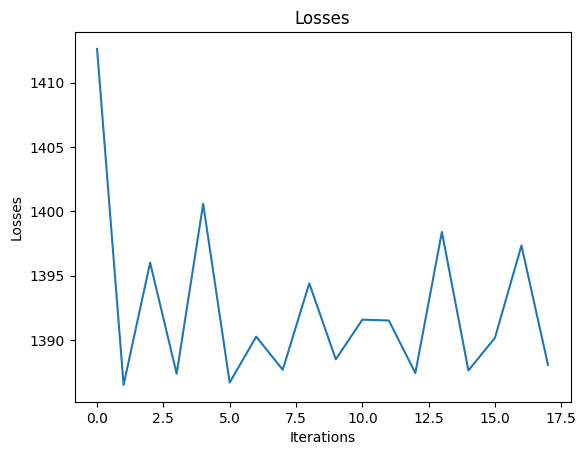

In [28]:
import matplotlib.pyplot as plt
# Define the classes in CIFAR10
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

correct = 0
total = 0
accuracies = []
# Test the model on the test dataset
with torch.no_grad():
    for images, labels in trainloader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        accuracy = 100 * correct / total
        accuracies.append(accuracy)
        
# Calculate the accuracy
accuracy = 100 * correct / total
print('Accuracy on the test dataset: %d %%' % accuracy)

# Строим график точности предсказания
plt.plot(accuracies)
plt.title('Accuracy on CIFAR10 Test Dataset')
plt.xlabel('Iterations')
plt.ylabel('Accuracy (%)')
plt.show()

plt.plot(losses)
plt.title('Losses')
plt.xlabel('Iterations')
plt.ylabel('Losses')
plt.show()
